# exercise 1

In [3]:
import pandas as pd
import numpy as np
import copy
import time
from sklearn.cluster import KMeans
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [23]:
def process_groceries_data(file_path):
    data = pd.read_csv('Groceries_dataset.csv')
    grouped_data = data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()

    pivoted_data = pd.DataFrame()
    for index, row in grouped_data.iterrows():
        new_row = {}
        new_row['transaction'] = str(row['Member_number']) + '_' + row['Date']
        
        for item in row['itemDescription']:
            new_row[item] = 1
        pivoted_data = pd.concat([pivoted_data, pd.DataFrame([new_row])], ignore_index=True)
    pivoted_data.fillna(0, inplace=True)
    return pivoted_data


In [24]:
data = process_groceries_data('Groceries_dataset.csv')
data_points = copy.deepcopy(data.to_numpy()[:, 1:])

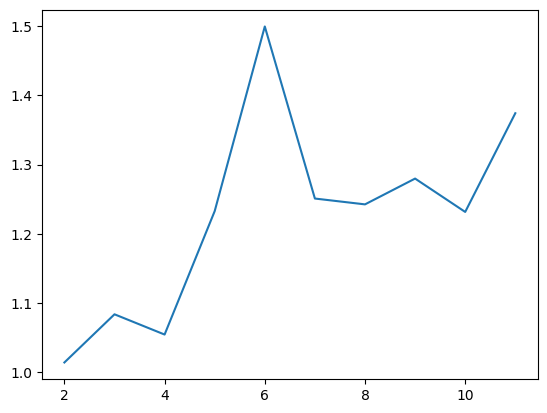

In [48]:
exec_time = []
k_ = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for k in k_:
    kmeans = KMeans(n_clusters=k, n_init=10)
    tik = time.time()
    kmeans.fit(data_points)
    exec_time.append(time.time()-tik)
plt.plot(k_, exec_time)

In [53]:
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_points)

for cluster_id in range(5):
    pts_in_cluster_count = 0
    for label in kmeans.labels_:
        if label == cluster_id:
            pts_in_cluster_count += 1
    print(pts_in_cluster_count)

similarity = distance.euclidean(kmeans.cluster_centers_[1],kmeans.cluster_centers_[0])

/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7915
1821
1796
2137
1294


# Exercise 2

In [5]:
def process_fraud_dataset(path):
    df = pd.read_csv(path)
    df.dropna()
    return df

In [7]:
path = 'PS_20174392719_1491204439457_log.csv'
data = process_fraud_dataset(path)

In [18]:
num_is_not_fraud = data['isFraud'].value_counts()[0]
num_is_fraud = data['isFraud'].value_counts()[1]

print('fraud:')
print(str(round(num_is_fraud/(num_is_fraud+num_is_not_fraud)*100, 5)) + '%')
print('not fraud:')
print(str(round(num_is_not_fraud/(num_is_fraud+num_is_not_fraud)*100, 5)) + '%')

fraud:
0.12908%
not fraud:
99.87092%


In [19]:
# remove columns from data
data = data.drop(columns=['isFraud', 'isFlaggedFraud', 'type', 'nameOrig', 'nameDest'])
data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.00,160296.36,0.00,0.00
1,1,1864.28,21249.00,19384.72,0.00,0.00
2,1,181.00,181.00,0.00,0.00,0.00
3,1,181.00,181.00,0.00,21182.00,0.00
4,1,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,850002.52,850002.52,0.00,0.00,0.00


In [24]:
df_subset = data.head(5000) #get only the first 5000 observations
df_subset

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.00,160296.36,0.00,0.00
1,1,1864.28,21249.00,19384.72,0.00,0.00
2,1,181.00,181.00,0.00,0.00,0.00
3,1,181.00,181.00,0.00,21182.00,0.00
4,1,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...
4995,5,67017.13,3942544.19,4009561.32,118844.67,51827.53
4996,5,122744.28,4009561.32,4132305.60,207106.34,84362.06
4997,5,414729.24,4132305.60,4547034.84,2109808.94,1695079.69
4998,5,328776.10,4547034.84,4875810.94,1019467.84,962737.60


In [25]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(df_subset)

NearestNeighbors(n_neighbors=3)

In [27]:
# threshold
distances, indices = neigh.kneighbors(df_subset)
indices

array([[   0, 3827, 1534],
       [   1, 4297, 1234],
       [   2, 2879, 2807],
       ...,
       [4997, 2286, 2762],
       [4998, 2523, 2266],
       [4999,  415, 3947]])

In [31]:
mean_distances = np.mean(distances, axis=1)
threshold = 50
outliers = np.where(mean_distances > threshold)[0]
outliers.shape

(4612,)

In [66]:
import time
k_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]
threshold = 50
exec_time_list = []
outliers_list = []

for k in k_list:
    tik = time.time()
    
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(df_subset)
    distances, indices = neigh.kneighbors(df_subset)
    mean_distances = np.mean(distances, axis=1)
    outliers_count = len(np.where(mean_distances > threshold)[0])
    
    exec_time_list.append(time.time()-tik)
    outliers_list.append(outliers_count)

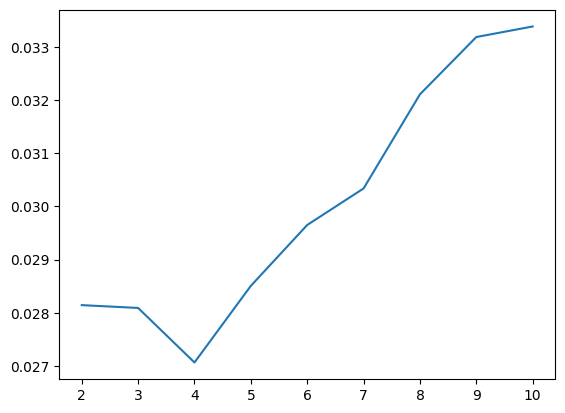

In [67]:
plt.plot(k_list, exec_time_list)

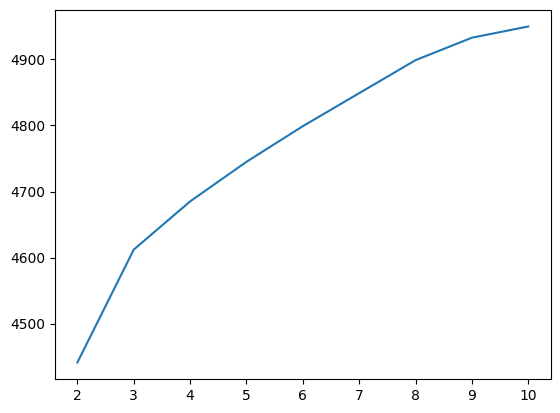

In [68]:
plt.plot(k_list, outliers_list)

In [61]:
k = 3
threshold_list = [50, 100, 200, 500, 800, 1000, 1200, 1500]
exec_time_list = []
outliers_list = []

for threshold in threshold_list:
    tik = time.time()
    
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(df_subset)
    distances, indices = neigh.kneighbors(df_subset)
    mean_distances = np.mean(distances, axis=1)
    outliers_count = len(np.where(mean_distances > threshold)[0])

    exec_time_list.append(time.time()-tik)
    outliers_list.append(outliers_count)

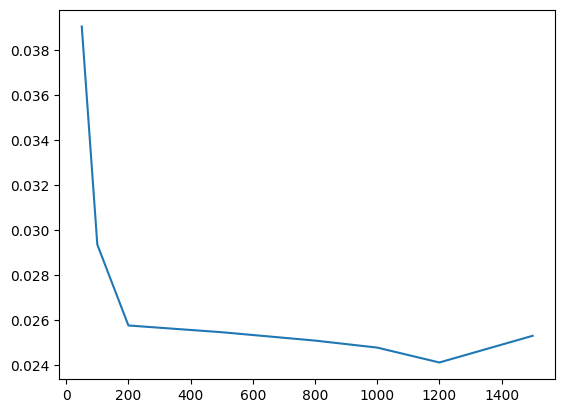

In [62]:
plt.plot(threshold_list, exec_time_list)

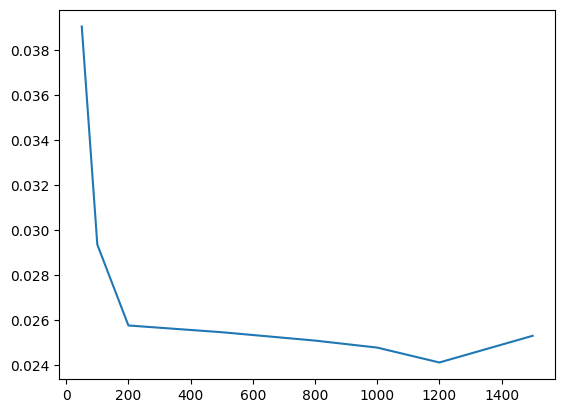

In [63]:
plt.plot(threshold_list, exec_time_list)